In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

vg = pd.read_csv('data/video_game_sales.csv')

# Remove latter years as limited data and early years, as not relevant
vg = vg[vg['Year'] < 2017]
vg = vg[vg['Year'] > 2007]
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [10]:
# By doing a count of sales for each region, you can understand whether data is missing from latter years (which it is)
vg.groupby(['Year']).agg({'NA_Sales':'count','EU_Sales':'count', 'JP_Sales':'count', 'Other_Sales':'count', 'Global_Sales':'count'})

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2008.0,1078,752,476,956,1428
2009.0,1056,808,405,1000,1431
2010.0,876,717,469,817,1259
2011.0,756,741,437,768,1139
2012.0,369,392,382,374,657
2013.0,329,358,314,339,546
2014.0,379,403,307,378,582
2015.0,316,392,329,326,614
2016.0,168,194,174,136,344


In [2]:
# Check if there is any correlation between variables
vg.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.073726,-0.449335,-0.439540,-0.319904,-0.471256,-0.474833
Year,0.073726,1.000000,0.001056,0.013495,-0.026932,0.029790,-0.003700
NA_Sales,-0.449335,0.001056,1.000000,0.806427,0.424353,0.765417,0.944146
EU_Sales,-0.439540,0.013495,0.806427,1.000000,0.428064,0.892196,0.935924
JP_Sales,-0.319904,-0.026932,0.424353,0.428064,1.000000,0.336501,0.546458
Other_Sales,-0.471256,0.029790,0.765417,0.892196,0.336501,1.000000,0.877289
Global_Sales,-0.474833,-0.003700,0.944146,0.935924,0.546458,0.877289,1.000000


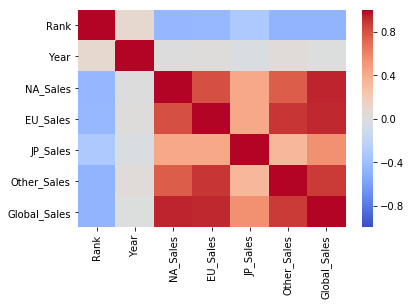

In [3]:
# Use a heatmap to make searching for correlations between variables easier
sns.heatmap(vg.corr(),
            vmin=-1,vmax=1,center=0,
            cmap="coolwarm");

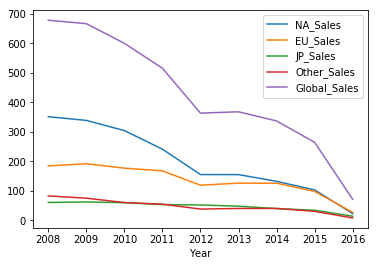

In [11]:
# Group data by year and then create columns for sales data for each region. Each column is plotted as a line
vg.groupby(['Year']).agg({'NA_Sales':'sum','EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum', 'Global_Sales':'sum'}).plot()

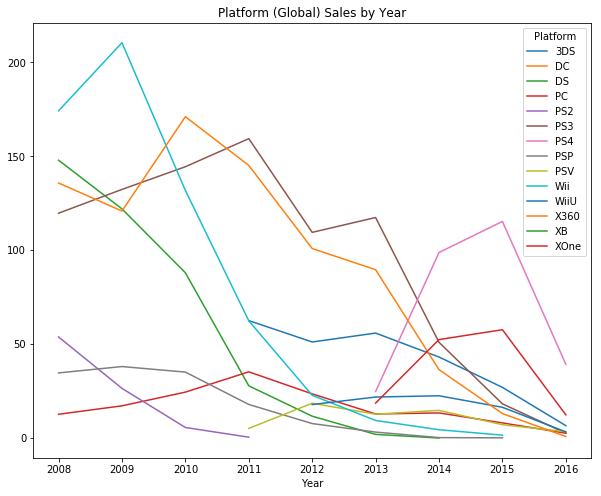

In [19]:
# In order to split out Global sales by platform, you first need a DF grouped by both platform and year, with the column data being global sales
# Then use unstack to get a table of platform against year. Then use .T to put platform as the column headers (i.e. series)
vg_unstack = vg.groupby(['Platform', 'Year'])['Global_Sales'].sum().unstack().T
vg_unstack.plot(figsize=(10,8), title="Platform (Global) Sales by Year")


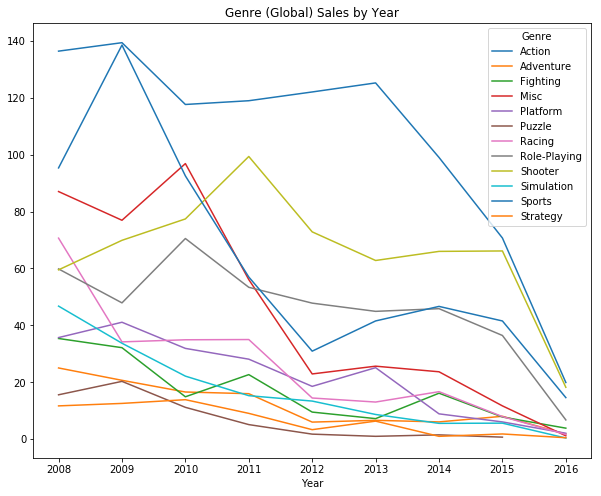

In [20]:
# Plot the global sales against year, split out by genre
vg_unstack = vg.groupby(['Genre', 'Year'])['Global_Sales'].sum().unstack().T
vg_unstack.plot(figsize=(10,8), title="Genre (Global) Sales by Year")

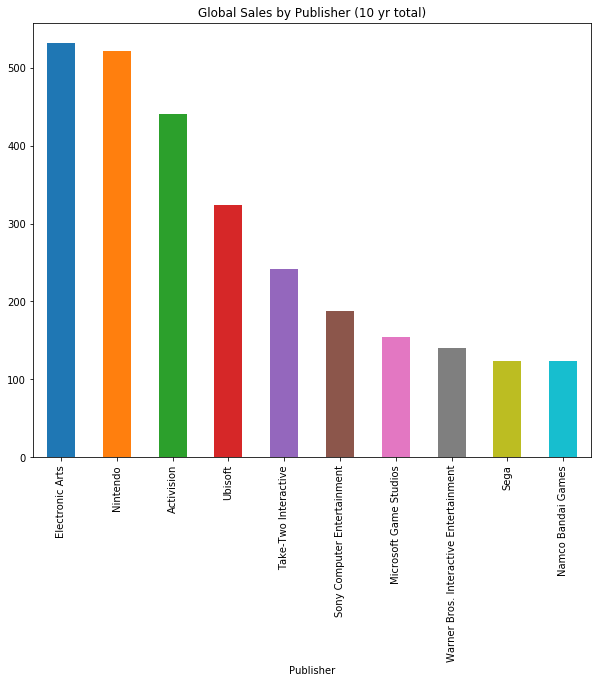

In [25]:
# Split the data by publisher, and then apply the value_counts function
vg_publishers = vg.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)

# Reduce the dataset to only plot the 10 biggest publishers
vg_10 = vg_publishers[:10]
vg_10.plot(kind='bar', figsize=(10,8), title='Global Sales by Publisher (10 yr total)')

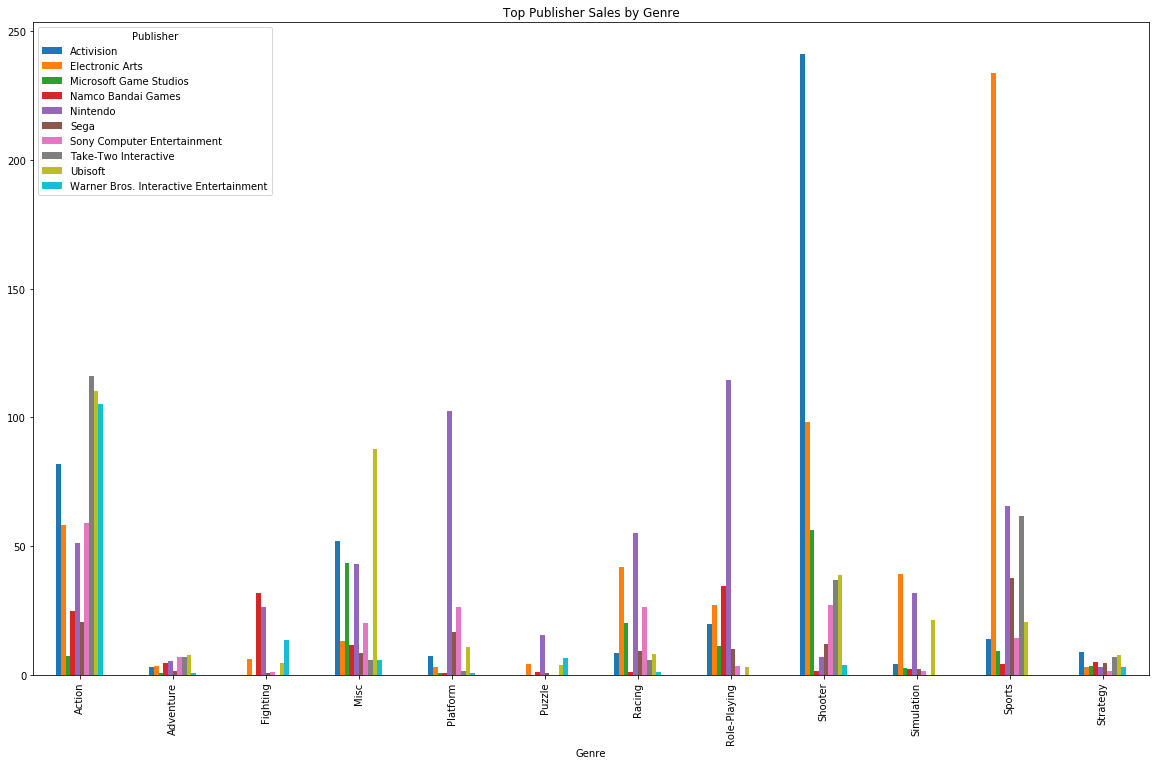

In [231]:
# Get a list of the top 10 biggest publishers by global sales
top_list = vg.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)[:10]

# Filter the DF to only show data for the top publishers
df2 = vg[vg["Publisher"].isin(top_list.index)]

# Group the filtered DF by publisher and genre and return the global sales for each. 
# Use .unstack().T to conver the DF into the correct format for plotting by sub-segments against genre
df_unstack = df2.groupby(["Publisher", "Genre"])["Global_Sales"].sum().sort_values(ascending=False).unstack().T
df_unstack.plot(kind="bar", figsize=(20,12), title="Top Publisher Sales by Genre")